# COMP4220: Machine Learning, Spring 2022, Assignment 4


> ## **Please submit one pdf file for all questions.**


# 1. KMeans:

In [9]:
#importing the libraries --add any additional libraries you will need here
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("titanic.csv")

# removing the columns not of interest
X_train = X_train.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked','Pclass','SibSp','Sex','Parch','Fare'], axis=1)

# removing rows of data with NaN 
X_train = X_train[X_train['Age'].notna()]

## a) Define X and y from the training data. Answer provided. Print X and y to see data.

In [22]:
X = X_train.drop(['Survived'], 1).astype(float)
y = X_train['Survived']

print(X, y)

      Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
885  39.0
886  27.0
887  19.0
889  26.0
890  32.0

[714 rows x 1 columns] 0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


C:\Users\koola\AppData\Local\Temp/ipykernel_408/651071171.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop(['Survived'], 1).astype(float)


## b) Perform KMeans on X

In [32]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
predict = kmeans.fit_predict(X_train)


## c) Plot the prediction for X

714 714


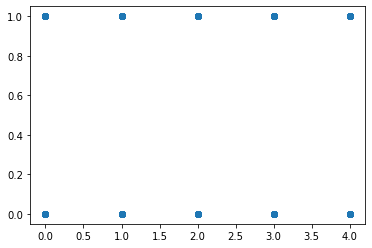

In [33]:
centers = kmeans.cluster_centers_
#plt.scatter(centers[:,0], centers[:,1], s=80, color = 'b')
plt.scatter(label,y)
print(len(y), len(predict))
plt.show()

## d) Compute the accuracy 

# 2. Classification using SVM

---



This is data collected from brain waves collection during a pain detection research project.

In [46]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [47]:
painData = pd.read_csv("pain.csv")

In [48]:
painData = painData.drop(['SubjectID','Index','Date', 'Time'], axis=1)
painData

,PainType,TP9,AF7,AF8,TP10,Right Axis,label
0,severe pain,68.847656,-73.242188,18.066406,27.832031,25.390625,3
1,severe pain,44.921875,-235.351562,36.621094,27.832031,-4.394531,3
2,severe pain,-11.230469,-81.054688,45.410156,29.296875,12.207031,3
3,severe pain,-2.929688,17.089844,33.203125,24.902344,44.433594,3
4,severe pain,10.253906,-58.105469,32.226562,14.648438,-0.976562,3
...,...,...,...,...,...,...,...
60191,moderate pain,33.203125,287.597656,45.898438,27.832031,25.878906,2
60192,moderate pain,24.414062,-20.507812,32.226562,21.484375,34.179688,2
60193,moderate pain,28.808594,-270.019531,24.902344,24.902344,34.667969,2
60194,moderate pain,37.109375,-190.917969,30.761719,31.250000,-36.132812,2


The label column is the target, and pain type is an explanation.

## a) Get X and y from painData above. X is TP9 and Right Axis. Y is label.

In [68]:
X = painData[['TP9', 'Right Axis']]
y = painData['label']


## a) Using a regularization parameter of c=1 and c=100, using a LinearSVC. 

In [69]:
scaler = StandardScaler()
svm_c1 = LinearSVC(C=1, loss = "hinge", random_state = 42)
svm_c100 = LinearSVC(C=100, loss = "hinge", random_state = 42)

## b) Scale the dataset using a pipeline

In [70]:
scaled_svm_c1 = Pipeline([
  ("scaler", scaler),
  ("linear_svc", svm_c1),                        
])

scaled_svm_c100 = Pipeline([
  ("scaler", scaler),
  ("linear_svc", svm_c100),                        
])

scaled_svm_c1.fit(X,y)
scaled_svm_c100.fit(X,y)

C:\Users\koola\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

## c) Plot dataset using the regularization parameter of c=1 and c=100

In [ ]:
SKIPPED

# 3. Decision Trees:
Using the same dataset above, meaning X and y

## a) Print the shape of X and y

In [72]:
print(X.shape)

(60196, 2)


In [63]:
print(y.shape)

(60196,)


## b) Train using a decision tree classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

c) Visualize the dataset

In [75]:
import os

project_root_dir = "."
chapter_id = "decision_trees"
images_path = os.path.join(project_root_dir, "images", chapter_id)
os.makedirs(images_path,exist_ok=True)
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
out_file=os.path.join(images_path,"pain_tree.dot"),
feature_names = ['TP9', 'Right Axis'],
class_names = 'label',
rounded = True,
filled = True
)

Source.from_file(os.path.join(images_path, "pain_tree.dot"))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

d) Plot the decision boundaries of the dataset

In [ ]:
SKIPPED

# 4. Ensemble Classifier and Random forest
Run on pain.csv

## a) Run a voting classifier that includes logistic regression, random forest classifier and SVM

## b) Print the accuracy scores 